In [8]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

In [9]:
# Importação dos dados
dataset = pd.read_csv("dataset_csv.CSV", delimiter=";")

# Análise exploratória dos dados

In [10]:
# Vizualizar as primeiras linhas
dataset.head()

,ID,AACPDM,formato,cor_casca,cor_polpa,NF,PT,Comp,Diam,ind_form,PF,PPB,RP,EC,BRIX
0,1,780.0,3,2,3,17,1219.39,63.57,57.54,1.11,75.28,25.02,33.65,6.56,15.43
1,2,825.0,5,3,3,5,339.88,70.38,55.40,1.29,67.98,21.30,31.16,9.92,17.04
2,3,832.5,1,3,3,30,1922.26,65.59,55.09,1.27,73.12,26.16,34.43,7.59,16.23
3,4,787.5,5,2,4,5,357.18,70.42,54.87,1.29,71.44,26.67,35.62,6.51,16.96
4,5,1005.0,7,2,1,4,359.42,67.53,56.85,1.19,89.86,35.31,39.31,9.83,15.85


In [11]:
# Dimensões do dataset em linhas e colunas respectivamente
dataset.shape

(87, 15)

In [12]:
# Verificação dos tipos dos campos
dataset.dtypes

ID             int64
AACPDM       float64
formato        int64
cor_casca      int64
cor_polpa      int64
NF             int64
PT           float64
Comp         float64
Diam         float64
ind_form     float64
PF           float64
PPB          float64
RP           float64
EC           float64
BRIX         float64
dtype: object

In [13]:
# Informações gerais do datset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         87 non-null     int64  
 1   AACPDM     87 non-null     float64
 2   formato    87 non-null     int64  
 3   cor_casca  87 non-null     int64  
 4   cor_polpa  87 non-null     int64  
 5   NF         87 non-null     int64  
 6   PT         87 non-null     float64
 7   Comp       87 non-null     float64
 8   Diam       87 non-null     float64
 9   ind_form   87 non-null     float64
 10  PF         87 non-null     float64
 11  PPB        87 non-null     float64
 12  RP         87 non-null     float64
 13  EC         87 non-null     float64
 14  BRIX       87 non-null     float64
dtypes: float64(10), int64(5)
memory usage: 10.3 KB


In [14]:
# Chegar valores perdidos
dataset.isnull().values.any()
dataset.isnull().sum()

ID           0
AACPDM       0
formato      0
cor_casca    0
cor_polpa    0
NF           0
PT           0
Comp         0
Diam         0
ind_form     0
PF           0
PPB          0
RP           0
EC           0
BRIX         0
dtype: int64

# Pré-processamento dos dados

In [15]:
# Exclui a coluna ID
coluna_exclui = ["ID"]
dataset_KM = dataset.drop(coluna_exclui, axis=1)

In [16]:
dataset_KM.head()

,AACPDM,formato,cor_casca,cor_polpa,NF,PT,Comp,Diam,ind_form,PF,PPB,RP,EC,BRIX
0,780.0,3,2,3,17,1219.39,63.57,57.54,1.11,75.28,25.02,33.65,6.56,15.43
1,825.0,5,3,3,5,339.88,70.38,55.40,1.29,67.98,21.30,31.16,9.92,17.04
2,832.5,1,3,3,30,1922.26,65.59,55.09,1.27,73.12,26.16,34.43,7.59,16.23
3,787.5,5,2,4,5,357.18,70.42,54.87,1.29,71.44,26.67,35.62,6.51,16.96
4,1005.0,7,2,1,4,359.42,67.53,56.85,1.19,89.86,35.31,39.31,9.83,15.85


In [17]:
# Obtém os valores dos atributos. Obtém os valores de cada variável no formato array
dataset_atrib = dataset_KM.values

In [18]:
# Imprimir o array
dataset_atrib # variáveris de entrada (os valores de "X")

array([[780.  ,   3.  ,   2.  , ...,  33.65,   6.56,  15.43],
       [825.  ,   5.  ,   3.  , ...,  31.16,   9.92,  17.04],
       [832.5 ,   1.  ,   3.  , ...,  34.43,   7.59,  16.23],
       ...,
       [780.  ,   5.  ,   2.  , ...,  32.12,   7.26,  16.08],
       [735.  ,   1.  ,   2.  , ...,  31.91,   9.76,  13.9 ],
       [802.5 ,   7.  ,   3.  , ...,  23.15,  10.71,  11.6 ]])

# Clusterização

In [ ]:
pip install scikit-learn

In [23]:
from sklearn.decomposition import PCA # PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist # calcular distâncias entre pontos e centróides usando distância euclidiana
from scipy.spatial.distance import pdist # calcular a distância entre pontos em um conjunto de dados
from sklearn.metrics import silhouette_score # calcular o Silhouette Score

## PCA para redução das variáveis

In [24]:
# Instanciando o objeto PCA com 2 componentes principais
pca = PCA(n_components=2)

# Ajustando o modelo e obtendo as projeções dos dados
dados_transformados = pca.fit_transform(dataset_KM)

In [25]:
# Obter os coeficientes de carga estimados
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calcular a importância relativa das variáveis em cada componente
importance = np.abs(loadings)

# Identificar as variáveis que explicam melhor a variação
best_variables = np.argmax(importance, axis=0)

# Imprimir as variáveis que explicam melhor cada componente
for i, variable_idx in enumerate(best_variables):
    variable_name = dataset_KM.columns[variable_idx]
    print(f"Componente {i+1}: Variável mais importante = {variable_name}")

Componente 1: Variável mais importante = PT
Componente 2: Variável mais importante = AACPDM


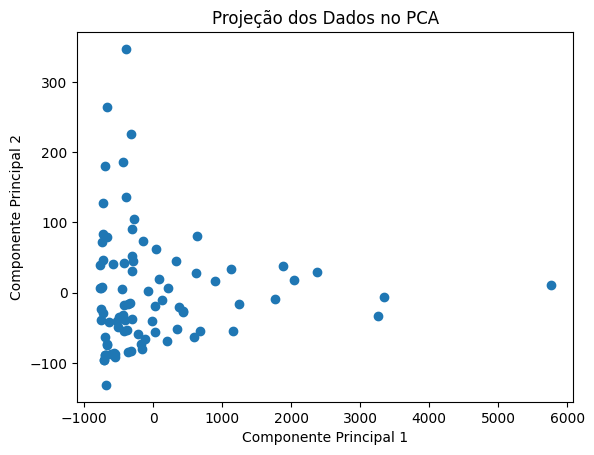

In [26]:
# Plotando os resultados em um gráfico de dispersão
plt.scatter(dados_transformados[:, 0], dados_transformados[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção dos Dados no PCA')
plt.show()

## K-means

In [27]:
pca = PCA(n_components=2).fit_transform(dataset_KM)

In [28]:
# Determinação de uma range de do hyperparâmetro "K" do Kmeans, 1 a 3 grupos
k_range = range(1,10)
k_range

range(1, 10)

In [ ]:
# Aplicando o modelo de K-means para cada valor de k
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

### Curva de Elbow

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

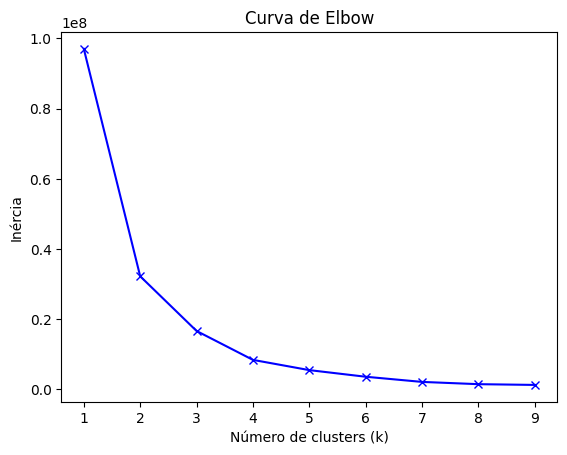

In [30]:
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca)
    inertias.append(kmeans.inertia_)

# Plotagem da curva de elbow
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Curva de Elbow')
plt.show()

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

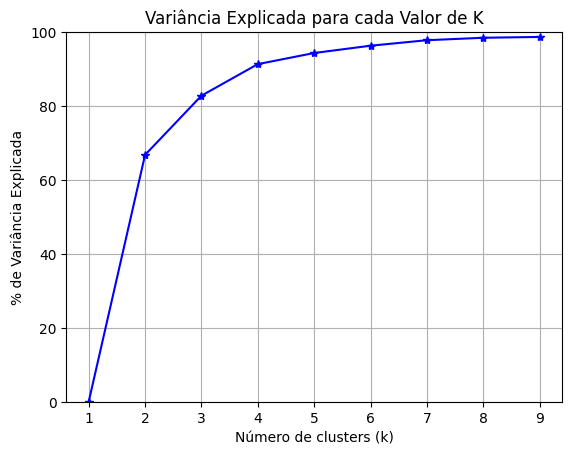

In [31]:
# Ajustando o centroide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculando a distância euclidiana de cada ponto de dados para o centroide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
soma_quandrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# Soma dos quadrados entre clusters
soma_quandrados_inter_cluster = soma_total - soma_quandrados_intra_cluster

# Plot da Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quandrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de clusters (k)')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')

### Escolhendo um valor de k inicial (igual a 2) para a valiar a máquina preditiva
Avaliação da máquina preditiva (índice de Silhouette - Silhouette score)
Quanto mais perto de 1 melhor, quanto mais perto de -1 pior

In [32]:
# Criando modelo com k = 2
modelo_v1 = KMeans(n_clusters = 2)
modelo_v1.fit(pca)

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [33]:
# Silhouette score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7552011855479512

In [34]:
# Criando modelo com k = 3
modelo_v2 = KMeans(n_clusters = 3)
modelo_v2.fit(pca)

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [35]:
# Silhouette score
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6654741890378746

In [36]:
# Criando modelo com k = 4
modelo_v3 = KMeans(n_clusters = 4)
modelo_v3.fit(pca)

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [37]:
# Silhouette score
labels = modelo_v3.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6280641448215502

In [38]:
# Criando modelo com k = 5
modelo_v4 = KMeans(n_clusters = 5)
modelo_v4.fit(pca)

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [39]:
# Silhouette score
labels = modelo_v4.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.5860999319056034

# Alicando a marcação nos clusters

In [40]:
# Lista com os nomes das colunas
names = ['ID', 'AACPDM', 'formato', 'cor_casca', 'cor_polpa', 'NF', 'PT', 'Comp',
         'Diam', 'ind_form', 'PF', 'PPB', 'RP', 'EC', 'BRIX']

In [41]:
# Incluindo o número de clusters no dataset
cluster_map = pd.DataFrame(dataset, columns = names)
cluster_map['cluster'] = modelo_v1.labels_

In [42]:
cluster_map

,ID,AACPDM,formato,cor_casca,cor_polpa,NF,PT,Comp,Diam,ind_form,PF,PPB,RP,EC,BRIX,cluster
0,1,780.0,3,2,3,17,1219.39,63.57,57.54,1.11,75.28,25.02,33.65,6.56,15.43,1
1,2,825.0,5,3,3,5,339.88,70.38,55.40,1.29,67.98,21.30,31.16,9.92,17.04,1
2,3,832.5,1,3,3,30,1922.26,65.59,55.09,1.27,73.12,26.16,34.43,7.59,16.23,0
3,4,787.5,5,2,4,5,357.18,70.42,54.87,1.29,71.44,26.67,35.62,6.51,16.96,1
4,5,1005.0,7,2,1,4,359.42,67.53,56.85,1.19,89.86,35.31,39.31,9.83,15.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,727.5,1,3,3,2,240.87,78.25,70.90,1.36,120.44,41.59,34.08,9.16,18.05,1
83,84,832.5,1,3,3,1,28.26,57.35,49.82,1.40,28.26,4.43,15.68,7.25,13.00,1
84,85,780.0,5,2,3,5,382.18,70.15,61.27,1.32,76.44,25.25,32.12,7.26,16.08,1
85,86,735.0,1,2,3,8,629.34,69.49,60.76,1.34,78.67,26.06,31.91,9.76,13.90,1
